 Introduction to Machine Learning 
 
Machine Learning is a collection of algorithms and techniques used to create computational systems that learn from data in order to make predictions and inferences.

Example:

Recommendation System: YouTube brings videos for each of its users based on a recommendation system that believes that the individual user will be interested in. Similarly Amazon and other such e-retailers suggest products that the customer will be interested in and likely to purchase by looking at the purchase history for a customer and a large inventory of products. 

Spam detection: Email service providers use a machine learning model that can automatically detect and move the unsolicited messages to the spam folder.

# Executing data science projects require three key skills: 
    
    1. Programming or hacking skills, 
    2. Math & Statistics, 
    3. Business or subject matter expertise for a given area of scope.


# Machine Learning Categories 

1.Supervised Learning 
    |->Regression 
    |->Classification 
2.Unsupervised Learning 
    |->Clustering 
    |->Dimension Reduction 
    |->Anomaly Detection 
3.Reinforcement Learning 

# Feature Engineering 

The process of converting raw data into information into insight with a business context to address a particular business problem is an important aspect of feature engineering

Dataset: Household Power Consumption

## Import and Data loading

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [4]:
os.getcwd()

'C:\\Users\\raghu'

In [5]:
os.chdir('D:\ML project')
os.getcwd()

'D:\\ML project'

In [6]:
hpc=pd.read_csv("hpc_breakdowns.csv",infer_datetime_format=True,parse_dates=[['Date','Time']], index_col='Date_Time')


In [7]:
hpc.head()

,Unnamed: 0,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_Time,,,,,,,,
2006-12-16 17:24:00,0,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,1,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,2,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,3,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,4,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [8]:
hpc.count()

Unnamed: 0               2049280
Global_active_power      2047237
Global_reactive_power    2048803
Voltage                  2047249
Global_intensity         2047279
Sub_metering_1           2047983
Sub_metering_2           2048070
Sub_metering_3           2049151
dtype: int64

# Data Analysis

Dealing with Missing Data 

1. Delete->dropna()
2. Replace with summary->fillna()
3. Random replace: You can also replace the missing values with a randomly picked value from the respective column. 
4. Using predictive model: This is an advanced technique. Here you can train a regression model for continuous variables and classification model for categorical variables with the available data and use the model to predict the missing values.


Find Missing value

In [9]:
hpc.isnull().sum()

Unnamed: 0                  0
Global_active_power      2043
Global_reactive_power     477
Voltage                  2031
Global_intensity         2001
Sub_metering_1           1297
Sub_metering_2           1210
Sub_metering_3            129
dtype: int64

Visualize Missing value

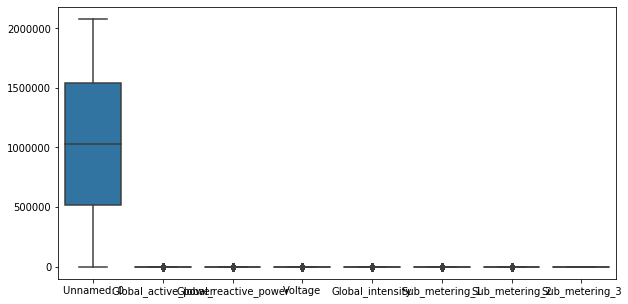

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(data = hpc)

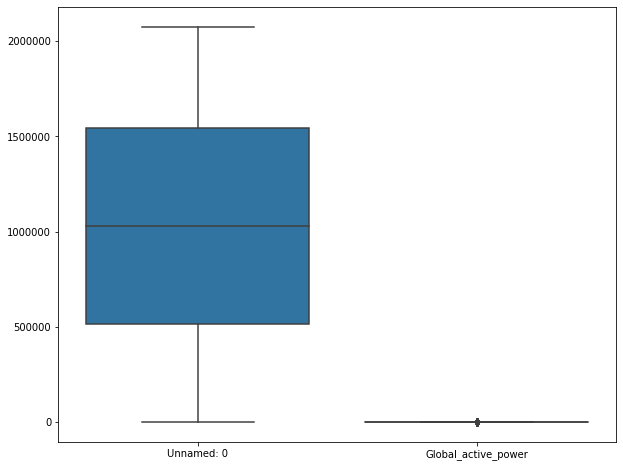

In [11]:
plt.figure(figsize=(10,8))
sns.boxplot(data = hpc.iloc[:, :2])

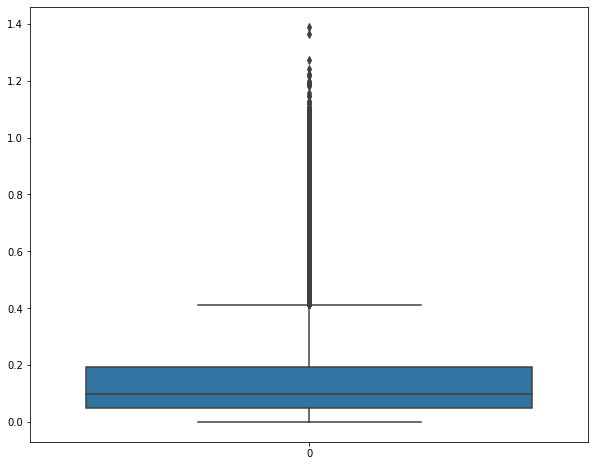

In [12]:
plt.figure(figsize=(10,8))
sns.boxplot(data = hpc.iloc[:, 2])

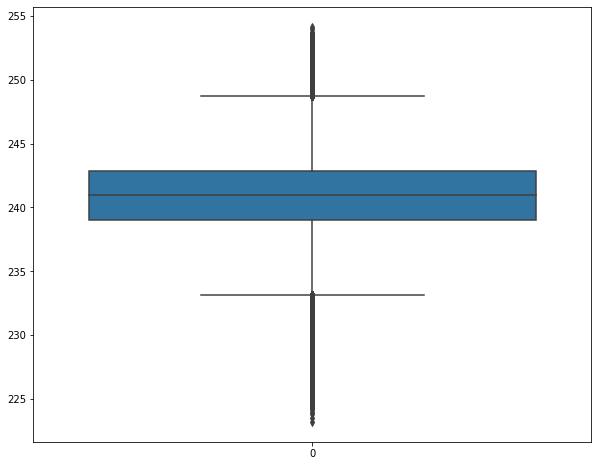

In [13]:
plt.figure(figsize=(10,8))
sns.boxplot(data = hpc.iloc[:, 3])

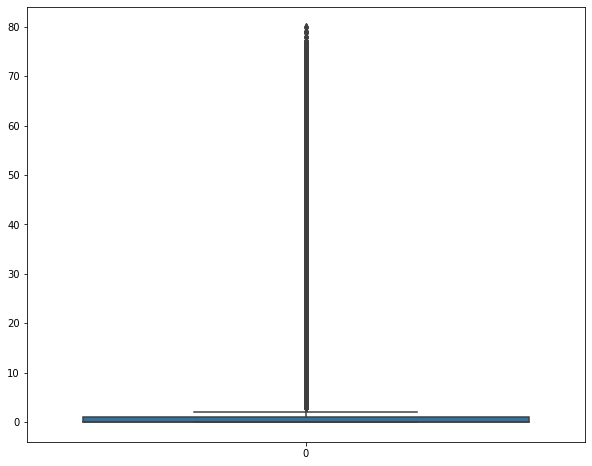

In [14]:
plt.figure(figsize=(10,8))
sns.boxplot(data = hpc.iloc[:, 6])

Removing Missing value

In [15]:
for i in range(0,8):        
        hpc.iloc[:,i]=hpc.iloc[:,i].fillna(hpc.iloc[:,i].mean())

In [16]:
hpc.isnull().sum()

Unnamed: 0               0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

# Normalizing Data 

A unit or scale of measurement for different variables varies, so an analysis with the raw measurement could be artificially skewed toward the variables with higher absolute values. Bringing all the different types of variable units in the same order of magnitude thus eliminates the potential outlier measurements that would misrepresent the finding and negatively affect the accuracy of the conclusion.


Rescaling of Data

1. Normalization :Normalizing data can be achieved by Min-Max scaling
2. Standardization:The standardization technique will transform the variables to have a zero mean and standard deviation of one

Before Scaling

In [17]:
hpc.describe()

,Unnamed: 0,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.031496e+06,1.091655e+00,1.237129e-01,2.408405e+02,4.627869e+00,1.122227e+00,1.298954e+00,6.458394e+00
std,5.964586e+05,1.056763e+00,1.127109e-01,3.237233e+00,4.442524e+00,6.152031e+00,5.821653e+00,8.436885e+00
min,0.000000e+00,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.162538e+05,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.028638e+06,6.040000e-01,1.000000e-01,2.410000e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.545307e+06,1.528000e+00,1.940000e-01,2.428800e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,2.075258e+06,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


After Scaling

In [18]:
x = hpc.iloc[0:8].values 

In [19]:
print ("\nOriginal data values : \n",  x) 


Original data values : 
 [[  0.      4.216   0.418 234.84   18.4     0.      1.     17.   ]
 [  1.      5.36    0.436 233.63   23.      0.      1.     16.   ]
 [  2.      5.374   0.498 233.29   23.      0.      2.     17.   ]
 [  3.      5.388   0.502 233.74   23.      0.      1.     17.   ]
 [  4.      3.666   0.528 235.68   15.8     0.      1.     17.   ]
 [  5.      3.52    0.522 235.02   15.      0.      2.     17.   ]
 [  6.      3.702   0.52  235.09   15.8     0.      1.     17.   ]
 [  7.      3.7     0.52  235.22   15.8     0.      1.     17.   ]]


In [20]:
from sklearn import preprocessing 
  
""" MIN MAX SCALER """
  
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
  
# Scaled feature 
hpc_min_max = min_max_scaler.fit_transform(x) 
  
print ("\nAfter min max Scaling : \n",hpc_min_max) 
  


After min max Scaling : 
 [[0.         0.37259101 0.         0.64853556 0.425      0.
  0.         1.        ]
 [0.14285714 0.98501071 0.16363636 0.14225941 1.         0.
  0.         0.        ]
 [0.28571429 0.99250535 0.72727273 0.         1.         0.
  1.         1.        ]
 [0.42857143 1.         0.76363636 0.18828452 1.         0.
  0.         1.        ]
 [0.57142857 0.07815846 1.         1.         0.1        0.
  0.         1.        ]
 [0.71428571 0.         0.94545455 0.72384937 0.         0.
  1.         1.        ]
 [0.85714286 0.09743041 0.92727273 0.75313808 0.1        0.
  0.         1.        ]
 [1.         0.09635974 0.92727273 0.80753138 0.1        0.
  0.         1.        ]]


In [21]:
""" Standardisation """
  
Standardisation = preprocessing.StandardScaler() 
  
# Scaled feature 
hpc_std = Standardisation.fit_transform(x) 
  
print ("\nAfter Standardisation : \n", hpc_std) 


After Standardisation : 
 [[-1.52752523 -0.18643795 -1.89706309  0.33589924 -0.0945736   0.
  -0.57735027  0.37796447]
 [-1.09108945  1.23783592 -1.44176795 -1.13536981  1.24400654  0.
  -0.57735027 -2.64575131]
 [-0.65465367  1.25526585  0.12647087 -1.54878426  1.24400654  0.
   1.73205081  0.37796447]
 [-0.21821789  1.27269577  0.22764757 -1.00161808  1.24400654  0.
  -0.57735027  0.37796447]
 [ 0.21821789 -0.871185    0.88529611  1.35727609 -0.85116237  0.
  -0.57735027  0.37796447]
 [ 0.65465367 -1.05295422  0.73353106  0.55476571 -1.08395891  0.
   1.73205081  0.37796447]
 [ 1.09108945 -0.82636519  0.68294271  0.63988044 -0.85116237  0.
  -0.57735027  0.37796447]
 [ 1.52752523 -0.82885518  0.68294271  0.79795067 -0.85116237  0.
  -0.57735027  0.37796447]]


In [22]:
hpc_pw = pd.DataFrame({'Global_active_power': hpc_std[:, 0], 'Global_reactive_power': hpc_std[:, 1],'Voltage':hpc_std[:, 2],'Global_intensity':hpc_std[:, 3] \
                ,'Sub_metering_1': hpc_std[:, 4], 'Sub_metering_2': hpc_std[:, 5],'Sub_metering_3': hpc_std[:, 5]})

# Exploratory Data Analysis 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A70BB1B148>,
      dtype=object)

<Figure size 720x360 with 0 Axes>

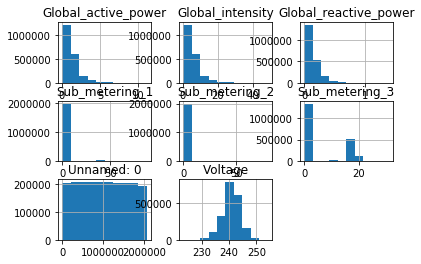

In [23]:
plt.figure(figsize=(10,5))
hpc.hist()

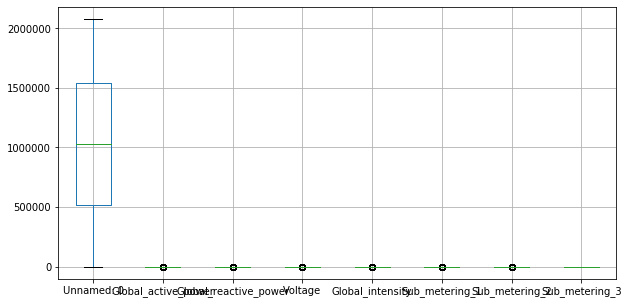

In [24]:
plt.figure(figsize=(10,5))
hpc.boxplot()

Correlation Matrix 

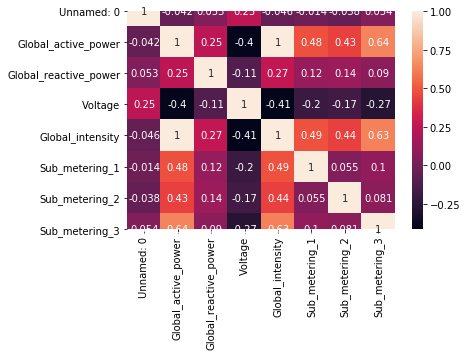

In [25]:
corr = hpc.corr()
sns.heatmap(corr, annot=True)

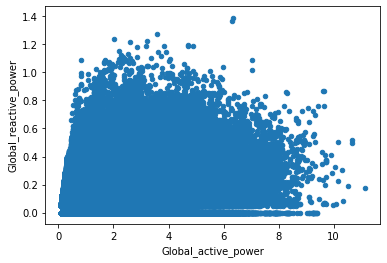

In [26]:
hpc.plot(kind="scatter",x="Global_active_power",y="Global_reactive_power")

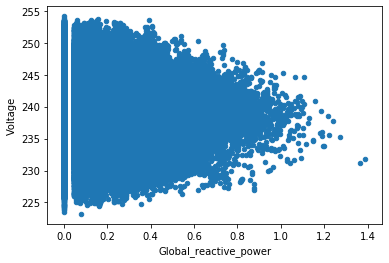

In [27]:
hpc.plot(kind="scatter",x="Global_reactive_power",y="Voltage")

In [28]:
#resampling Calculate power consumed per month month data

hpc_res = hpc.resample('M').mean()
hpc_res.var()

Unnamed: 0               3.759743e+11
Global_active_power      8.942071e-02
Global_reactive_power    4.797167e-04
Voltage                  2.417981e+00
Global_intensity         1.481130e+00
Sub_metering_1           1.139900e-01
Sub_metering_2           1.507990e-01
Sub_metering_3           2.355288e+00
dtype: float64

In [29]:
hpc.drop(['Unnamed: 0'],inplace=True,axis=1)

In [50]:
hpc_res = hpc.resample('M').mean()
hpc_res.var()

Global_active_power      0.089421
Global_reactive_power    0.000480
Voltage                  2.417981
Global_intensity         1.481130
Sub_metering_1           0.113990
Sub_metering_2           0.150799
Sub_metering_3           2.355288
dtype: float64

In [51]:
hpc_res.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_Time,,,,,,,
2006-12-31,1.902314,0.131386,241.441125,8.021025,1.252769,2.214987,7.409558
2007-01-31,1.546008,0.132676,240.902849,6.548496,1.266726,1.775931,7.383351
2007-02-28,1.401084,0.113637,240.517972,5.915439,1.180217,1.602361,6.703557
2007-03-31,1.317567,0.114747,240.514361,5.572979,1.362047,2.346872,6.504648
2007-04-30,0.891857,0.118778,239.403557,3.825676,1.066256,0.973149,4.800339


Data Preprocessing

In [52]:
X = hpc_res.drop('Global_intensity', axis = 1)
y = hpc_res['Global_intensity']

Performing Train Test Split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35,  random_state=42)

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error


In [55]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [56]:
print('Training Score: ', knn.score(X_train, y_train))
print('Testing score: ', knn.score(X_test, y_test))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('R2_score: ', r2_score(y_test, y_pred))
print('Mean_Absolute_Error: ', mean_absolute_error(y_test, y_pred))

Training Score:  0.85767525457626
Testing score:  0.7871341834624704
Mean Squared Error:  0.24398685333544212
R2_score:  0.7871341834624704
Mean_Absolute_Error:  0.42158510559462464


In [57]:
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred  =LR.predict(X_test)

In [58]:
print('Training Score: ', LR.score(X_train, y_train))
print('Testing score: ', LR.score(X_test, y_test))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('R2_score: ', r2_score(y_test, y_pred))
print('Mean_Absolute_Error: ', mean_absolute_error(y_test, y_pred))

Training Score:  0.9998451731896586
Testing score:  0.9995928723119871
Mean Squared Error:  0.0004666498600843958
R2_score:  0.9995928723119871
Mean_Absolute_Error:  0.017023332373686206


In [59]:
svr = SVR(kernel='poly', degree=8)
svr.fit(X_train, y_train)
y_pred  =svr.predict(X_test)
print('Training Score: ', svr.score(X_train, y_train))
print('Testing score: ', svr.score(X_test, y_test))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('R2_score: ', r2_score(y_test, y_pred))
print('Mean_Absolute_Error: ', mean_absolute_error(y_test, y_pred))

Training Score:  0.9973197856355912
Testing score:  0.9947294173851592
Mean Squared Error:  0.006041143140579259
R2_score:  0.9947294173851592
Mean_Absolute_Error:  0.05867787657956757


D:\anconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [60]:
svr = SVR(kernel='rbf', degree=8)
svr.fit(X_train, y_train)
y_pred  =svr.predict(X_test)
print('Training Score: ', svr.score(X_train, y_train))
print('Testing score: ', svr.score(X_test, y_test))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('R2_score: ', r2_score(y_test, y_pred))
print('Mean_Absolute_Error: ', mean_absolute_error(y_test, y_pred))

Training Score:  0.8233075368872238
Testing score:  0.8168062575234116
Mean Squared Error:  0.20997671446098898
R2_score:  0.8168062575234116
Mean_Absolute_Error:  0.36214582307236204


D:\anconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [61]:
svr = SVR(kernel='sigmoid', degree=8)
svr.fit(X_train, y_train)
y_pred  =svr.predict(X_test)
print('Training Score: ', svr.score(X_train, y_train))
print('Testing score: ', svr.score(X_test, y_test))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('R2_score: ', r2_score(y_test, y_pred))
print('Mean_Absolute_Error: ', mean_absolute_error(y_test, y_pred))

Training Score:  -0.008255227205489213
Testing score:  -0.0020327672628572824
Mean Squared Error:  1.1485302140109759
R2_score:  -0.0020327672628572824
Mean_Absolute_Error:  0.9301534011563163


D:\anconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [62]:
results=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
results

,Actual,Predicted
Date_Time,,
2009-03-31,5.148976,4.71701
2010-04-30,4.305192,4.71701
2009-02-28,5.198614,4.71701
2010-07-31,3.132494,4.71701
2008-12-31,5.298371,4.71701
2010-01-31,5.947544,4.71701
2007-12-31,6.821634,4.71701
2008-07-31,3.466532,4.71701
2007-04-30,3.825676,4.71701


In [63]:
# RMSE by Pandas
((results.Actual - results.Predicted) ** 2).mean() ** .5

1.0716950191220336

In [64]:
# RMSE by Numpy
(np.diff(results.values) ** 2).mean() ** .5

1.0716950191220336

To predict if the Global Intensity is greater than 15

In [65]:
hpc_res = hpc.resample('M').median()
hpc_res.var()

Global_active_power      0.167812
Global_reactive_power    0.000469
Voltage                  2.251579
Global_intensity         2.533457
Sub_metering_1           0.000000
Sub_metering_2           0.000000
Sub_metering_3           6.588652
dtype: float64

In [66]:
hpc_res.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_Time,,,,,,,
2006-12-31,1.708,0.114,241.69,7.2,0.0,0.0,0.0
2007-01-31,1.374,0.126,241.24,5.6,0.0,0.0,0.0
2007-02-28,1.266,0.104,240.74,5.2,0.0,0.0,0.0
2007-03-31,0.866,0.096,240.78,3.6,0.0,0.0,0.0
2007-04-30,0.384,0.104,239.95,1.8,0.0,0.0,0.0


In [67]:
hpc_res["Global_intensity_test"] = [1 if x<=15 else 0 for x in hpc_res["Global_intensity"]]

In [68]:
hpc_res.count()

Global_active_power      48
Global_reactive_power    48
Voltage                  48
Global_intensity         48
Sub_metering_1           48
Sub_metering_2           48
Sub_metering_3           48
Global_intensity_test    48
dtype: int64

In [69]:
hpc_res.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Global_intensity_test
Date_Time,,,,,,,,
2006-12-31,1.708,0.114,241.69,7.2,0.0,0.0,0.0,1
2007-01-31,1.374,0.126,241.24,5.6,0.0,0.0,0.0,1
2007-02-28,1.266,0.104,240.74,5.2,0.0,0.0,0.0,1
2007-03-31,0.866,0.096,240.78,3.6,0.0,0.0,0.0,1
2007-04-30,0.384,0.104,239.95,1.8,0.0,0.0,0.0,1


In [70]:
X = hpc_res.drop('Global_intensity_test', axis = 1)
y = hpc_res['Global_intensity_test']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35,  random_state=42)

In [72]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Training Score: ', knn.score(X_train, y_train))
print('Testing score: ', knn.score(X_test, y_test))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('R2_score: ', r2_score(y_test, y_pred))
print('Mean_Absolute_Error: ', mean_absolute_error(y_test, y_pred))


Training Score:  1.0
Testing score:  1.0
Mean Squared Error:  0.0
R2_score:  1.0
Mean_Absolute_Error:  0.0


In [73]:
accuracy = 100 * (sum(hpc_res["Global_intensity_test"])/hpc_res.shape[0])
accuracy

100.0

In [74]:
from sklearn.metrics import classification_report,confusion_matrix

In [76]:
print(confusion_matrix(y_test,y_pred))

[[17]]


In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17

